# Introduction
In this case, we are going to go through Principal Component Analysis (PCA) by using Singular Value Decomposition (SVD).

In [107]:
import numpy as np
# %matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("mouse.csv", index_col=0)
print(df)

        Gene1  Gene2  Gene3  Gene4
Mouse1     10    6.0   12.0      5
Mouse2     11    4.0    9.0      7
Mouse3      8    5.0   10.0      6
Mouse4      3    3.0    2.5      2
Mouse5      1    2.8    1.3      4
Mouse6      2    1.0    2.0      7


# Plotting

1. Gen1 vs Gen2 Scatterplot

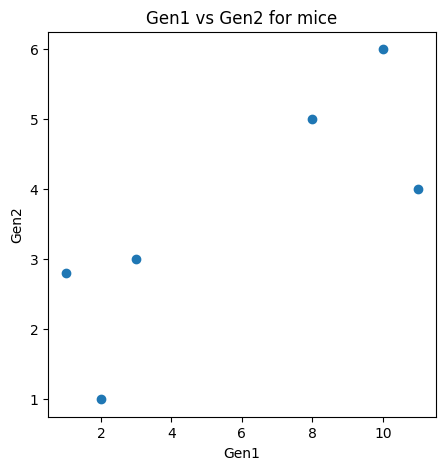

In [109]:
fig1 = plt.figure(figsize=(5, 5))
plt.scatter(x=df.Gene1, y=df.Gene2)
plt.title("Gen1 vs Gen2 for mice")
plt.xlabel("Gen1")
plt.ylabel("Gen2")
plt.show()

2. Gen1 vs Gen2 vs Gen3 3d Scatterplot

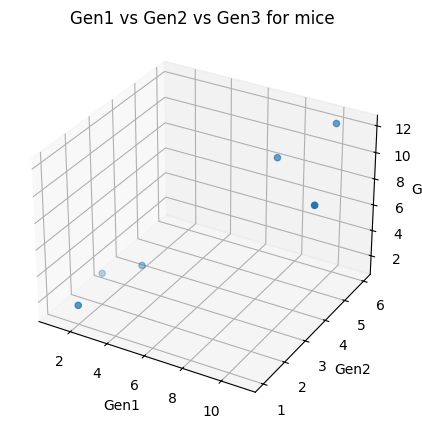

In [110]:
# Create a new figure
fig2 = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")

# Create the plot
ax.scatter3D(xs=df.Gene1, ys=df.Gene2, zs=df.Gene3)
plt.title("Gen1 vs Gen2 vs Gen3 for mice")
ax.set_xlabel("Gen1")
ax.set_ylabel("Gen2")
ax.set_zlabel("Gen3")

# show plot
plt.show()

# PCA
* PCA could take four or more gene measurements (four or more dimensions), and make a 2-dimensional PCA plot. This plot will show us that similar mice cluster together.
* PCA will also tell us which gene (variable) is most valuable to cluster the data.
* PCA can also tell us how accurate the 2D graph is.

## Start with only focusing on Gen1 and Gen2

In [111]:
# Extract Gen1 and Gen2
sm_df = df[['Gene1', 'Gene2']]
print(sm_df)


        Gene1  Gene2
Mouse1     10    6.0
Mouse2     11    4.0
Mouse3      8    5.0
Mouse4      3    3.0
Mouse5      1    2.8
Mouse6      2    1.0


In [112]:
# fig3 = plt.figure(figsize=(5, 5))
# plt.scatter(x=sm_df.Gene1, y=sm_df.Gene2)
# plt.title("Gen1 vs Gen2 for mice")
# plt.xlabel("Gen1")
# plt.ylabel("Gen2")
# plt.show()

1. Imply with the scikit-learn PCA build-in

In [113]:
# import a scikit-learn library
from sklearn.decomposition import PCA

In [114]:
# get the dimension (number of genes) of the Gen1 vs Gen2 dataset
sm_df_dim = sm_df.shape[1]
print(f'There are {sm_df_dim} genes in this dataset')

There are 2 genes in this dataset


In [115]:
# build the PCA model
sm_pca = PCA(n_components=sm_df_dim)
sm_pca.fit(sm_df)


PCA(n_components=2)

In [116]:
sm_cov = sm_pca.get_covariance()
print(sm_cov)

[[18.96666667  6.12666667]
 [ 6.12666667  3.12666667]]


In [117]:
sm_precision = sm_pca.get_precision()
print(sm_precision)

[[ 0.14364648 -0.28147359]
 [-0.28147359  0.87137362]]


In [118]:
print(np.matmul(sm_precision, sm_cov))

[[ 1.00000000e+00  7.04815524e-17]
 [-6.42613002e-16  1.00000000e+00]]


2. Imply with customized PCA

In [119]:
# build the pca function
def customized_pca_svd(X, num_components=1):
    # Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Calculate the covariance matrix
    cov_matrix = np.cov(X_std, rowvar=False)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the original data onto the principal components
    pca_result = np.dot(X_std, principal_components)

    return pca_result, principal_components

In [120]:
pca_result, principal_components = customized_pca_svd(X=sm_df, num_components=sm_df_dim)

In [121]:
pca_result

array([[ 1.77783141,  0.29565849],
       [ 1.07956967, -0.75832475],
       [ 0.98404866,  0.21331874],
       [-0.78137758,  0.2265    ],
       [-1.22471133,  0.49460925],
       [-1.83536082, -0.47176174]])

In [122]:
pca_result.shape

(6, 2)

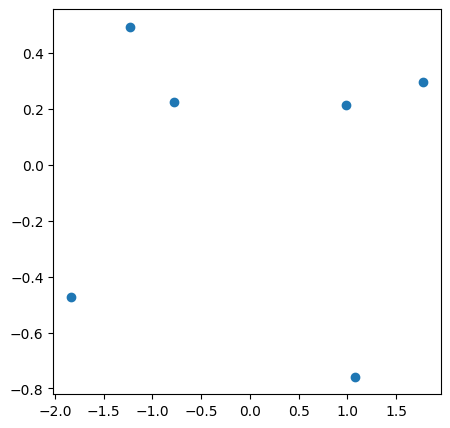

In [123]:
fig4 = plt.figure(figsize=(5, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

In [124]:
principal_components


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

## Use the entire mice dataset

In [125]:
# re-check the dataset
df

,Gene1,Gene2,Gene3,Gene4
Mouse1,10,6.0,12.0,5
Mouse2,11,4.0,9.0,7
Mouse3,8,5.0,10.0,6
Mouse4,3,3.0,2.5,2
Mouse5,1,2.8,1.3,4
Mouse6,2,1.0,2.0,7


In [126]:
# get the dimension (number of genes) of the Gen1 vs Gen2 dataset
df_dim = df.shape[1]
print(f'There are {df_dim} genes in this dataset')

There are 4 genes in this dataset


In [127]:
pca = PCA(n_components=df_dim)
pca.fit(df)

PCA(n_components=4)

In [128]:
print(pca.components_)

[[ 0.65141565  0.23309911  0.71172364  0.12153982]
 [ 0.14289984 -0.4160495  -0.14585069  0.88612077]
 [ 0.73948678 -0.2300579  -0.54728596 -0.31734957]
 [ 0.09163298  0.84831656 -0.4155179   0.3151306 ]]
